In [12]:
import pandas as pd
import random
import datetime
import numpy as np
from itertools import repeat
import pickle
import math
import time
import gurobipy as gp
from gurobipy import *

import matplotlib
import matplotlib.pylab as plt
%matplotlib inline
%matplotlib nbagg
import random

In [13]:
def create_dataframe(excel_data_path):
    """
    Takes in order data in excel format, returns order and equipments in pandas dataframes

    """
    xls = pd.ExcelFile(excel_data_path)
    items = pd.read_excel(xls, 'items')
    bins = pd.read_excel(xls, 'bins')

    return items, bins

def sort_items(items, *columns):
    """
    :param items: items dataframe
    :param columns: columns that will be sorted
    :return: sorted items dataframe
    """
    column_list = list(columns)
    bool_list = [False] * len(column_list)
    items.sort_values(by=column_list, ascending=bool_list, inplace=True)
    return items




#randomize sorting based on weight
def randomized_weight_sort(items):
    """
    :param items: dataframe
    :return: sorted dataframe based on the condition
    """
    length = len(items) if len(items) % 2 == 0 else len(items) - 1
    for i in range(0, length, 2):
        if random.random() < 0.5:
            if (0.7 < (items.iloc[i, :].weight) / (items.iloc[i + 1, :].weight) < 1.3):
                a, b = items.iloc[i, :].copy(), items.iloc[i + 1, :].copy()
                items.iloc[i, :], items.iloc[i + 1, :] = b, a
    return items


In [14]:
#randomize sorting based on weight
def randomized_sort(df):
    """
    :param df: dataframe
    :return: sorted dataframe based on the condition
    """
    length = len(df) if len(df) % 2 == 0 else len(df) - 1
    for i in range(0, length, 2):
        if random.random() < 0.5:
            if (0.7 < (df.iloc[i, :].weight) / (df.iloc[i + 1, :].weight) < 1.3):
                a, b = df.iloc[i, :].copy(), df.iloc[i + 1, :].copy()
                df.iloc[i, :], df.iloc[i + 1, :] = b, a
    return df

In [15]:
def sort_data(items_dataframe,descending_column_list,ascending_columns_list ):
    """
    :param items: items dataframe
    :param columns: columns that will be sorted
    :return: sorted items dataframe
    """
    column_list=descending_column_list+ascending_columns_list
    bool_list=[False] * len(descending_column_list)+[True]*len(ascending_columns_list)

    items_dataframe.sort_values(by=column_list, ascending=bool_list, inplace=True)
    return items_dataframe

In [16]:
#randomize sorting based on weight
def randomized_weight_sort(items_data,column):
    """
    :param items: dataframe
    :return: sorted dataframe based on the condition
    """
    length = len(items) if len(items) % 2 == 0 else len(items) - 1
    for i in range(0, length, 2):
        if random.random() < 0.5:
            if (0.7 < (items.iloc[i, :].weight) / (items.iloc[i + 1, :].weight) < 1.3):
                a, b = items.iloc[i, :].copy(), items.iloc[i + 1, :].copy()
                items.iloc[i, :], items.iloc[i + 1, :] = b, a
    return items



In [17]:
orders=list(items_data.order.unique())
for i in orders:
    l=items_data[items_data.order==1].shape[0]

    length = l if l % 2 == 0 else l - 1
    for i in range(0, length, 2):
        if random.random() < 0.5:
            if (0.7 < (items.iloc[i, :].weight) / (items.iloc[i + 1, :].weight) < 1.3):
                a, b = items.iloc[i, :].copy(), items.iloc[i + 1, :].copy()
                items.iloc[i, :], items.iloc[i + 1, :] = b, a

#for i in range

NameError: name 'items_data' is not defined

In [18]:
def group_by_sum(items_dataframe, group_by_column, volume,weight):

    items_dataframe["sum_volume"] = items_dataframe.groupby(group_by_column)[[volume]].transform(sum)
    items_dataframe["sum_weight"] = items_dataframe.groupby(group_by_column)[[weight]].transform(sum)

    return items_dataframe

In [19]:
filepath="C:/Users/Ashrafur.Rahman/OneDrive - Blume Global/Data and Codes/Container Loading/data/3d-bin-packing/3d-bin-packing-toy-large-200-line-items-7.xlsx"

#filepath=r"C:\Users\Ashrafur.Rahman\OneDrive - Blume Global\Data and Codes\Container Loading\data\3d-bin-packing\3d-bin-packing-toy-small-line-items.xlsx"

items_data, bins_data=create_dataframe(filepath)


In [20]:
items_data=group_by_sum(items_data,"order","volume","weight")


In [21]:
items_data=sort_data(items_data,["sum_volume","sum_weight",'volume',"weight"],["order"])

In [22]:
#items_data=sort_items(items_data,'volume','weight')
#items_data=randomized_weight_sort(items_data)

In [23]:
items_data

,order,order_item,item,length,height,width,volume,weight,p_class,stackability,customer,priority,sum_volume,sum_weight
44,5,5,45,6,5,6,180,386,D,0,2,2,977,6755
45,5,6,46,5,5,6,150,821,A,1,1,2,977,6755
46,5,7,47,5,4,6,120,824,B,1,3,3,977,6755
47,5,8,48,6,3,6,108,840,C,0,3,3,977,6755
48,5,9,49,4,4,6,96,869,D,0,1,3,977,6755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,1,10,10,3,3,5,45,885,B,1,2,3,561,7810
0,1,1,1,5,3,3,45,789,A,1,2,3,561,7810
8,1,9,9,4,2,5,40,353,A,1,3,1,561,7810
3,1,4,4,4,3,3,36,642,D,0,2,3,561,7810


In [24]:
bins_data

,bin,type,length,height,width,volume,weight
0,1,53-ft,53,9,8.5,4054.5,57000
1,2,53-ft,53,9,8.5,4054.5,57000
2,3,40-ft,40,8,8.5,2720.0,48200
3,4,40-ft,40,8,8.5,2720.0,48200
4,5,20-ft,20,8,8.5,1360.0,42000
5,6,20-ft,20,8,8.5,1360.0,42000
6,7,20-ft,20,8,8.5,1360.0,42000


In [25]:
length=len(items_data) if len(items_data)%2==0 else len(items_data)-1
for i in range(0,length,2):
    if random.random()<0.5:
        if (0.7< items_data.iloc[i].weight/items_data.iloc[i+1].weight< 1.3):
            a, b = items_data.iloc[i, :].copy(), items_data.iloc[i+1, :].copy()
            items_data.iloc[i, :], items_data.iloc[i+1, :] = b, a


In [26]:

"""
ww=dict(zip(zip(items_data.order,items_data.item),items_data.width))
ll=dict(zip(zip(items_data.order,items_data.item),items_data.length))
hh=dict(zip(zip(items_data.order,items_data.item),items_data.height))
weight=dict(zip(zip(items_data.order,items_data.item),items_data.weight))
volume=dict(zip(zip(items_data.order,items_data.item),items_data.volume))
p_class=dict(zip(zip(items_data.order,items_data.item),items_data.p_class))
customer=dict(zip(zip(items_data.order,items_data.item),items_data.customer))
priority=dict(zip(zip(items_data.order,items_data.item),items_data.priority))

"""

ww=dict(zip(items_data.item,items_data.width))
ll=dict(zip(items_data.item,items_data.length))
hh=dict(zip(items_data.item,items_data.height))
weight=dict(zip(items_data.item,items_data.weight))
volume=dict(zip(items_data.item,items_data.volume))
p_class=dict(zip(items_data.item,items_data.p_class))
customer=dict(zip(items_data.item,items_data.customer))
priority=dict(zip(items_data.item,items_data.priority))
#W=dict(zip(bins.bin,bins.width))
#H=dict(zip(bins.bin,bins.height))
#L=dict(zip(bins.bin,bins.length))

In [27]:
bins_dim=dict(zip(bins_data.bin,zip(bins_data.type,bins_data.length,bins_data.height,bins_data.width,bins_data.volume,bins_data.weight)))


#bin characteristics
L={}
W={}
H={}
volume_capacity={}
weight_capacity={}
volume_utilization={}
weight_utilization={}
#bins=[1,2,3]
bins=bins_data.bin.tolist()
zones=4

orientations=['o1','o2','o3','o4','o5','o6']

weight_capacity_zone={}
for e in bins:
    L[e]=bins_dim[e][1]
    W[e]=bins_dim[e][2]
    H[e]=bins_dim[e][3]

    volume_capacity[e]=bins_dim[e][4]
    weight_capacity[e]=bins_dim[e][5]

In [28]:
L

{1: 53, 2: 53, 3: 40, 4: 40, 5: 20, 6: 20, 7: 20}

In [29]:
volume_capacity

{1: 4054.5, 2: 4054.5, 3: 2720.0, 4: 2720.0, 5: 1360.0, 6: 1360.0, 7: 1360.0}

In [30]:
#iteration results
IP_iter={}
volume_utilization_iter={}
weight_utilization_iter={}
c_gravity_y_iter={}
dev_gravity_center_iter={}

unused_bins_iter={}
used_bins_iter={}

x_iter={}
y_iter={}
z_iter={}

l_iter={}
w_iter={}
h_iter={}

iterations=2

In [31]:
items_data

,order,order_item,item,length,height,width,volume,weight,p_class,stackability,customer,priority,sum_volume,sum_weight
44,5,5,45,6,5,6,180,386,D,0,2,2,977,6755
45,5,6,46,5,5,6,150,821,A,1,1,2,977,6755
46,5,7,47,5,4,6,120,824,B,1,3,3,977,6755
47,5,8,48,6,3,6,108,840,C,0,3,3,977,6755
48,5,9,49,4,4,6,96,869,D,0,1,3,977,6755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,1,10,10,3,3,5,45,885,B,1,2,3,561,7810
0,1,1,1,5,3,3,45,789,A,1,2,3,561,7810
8,1,9,9,4,2,5,40,353,A,1,3,1,561,7810
3,1,4,4,4,3,3,36,642,D,0,2,3,561,7810


In [32]:
orders=list(items_data.order.unique())

line_items={}
for o in orders:
    line_items[o]=items_data[items_data["order"]==o].item.to_list()

In [33]:
line_items

{5: [45, 46, 47, 48, 49, 44, 50, 42, 41, 43],
 4: [40, 31, 37, 34, 32, 36, 38, 39, 33, 35],
 3: [30, 24, 29, 23, 22, 25, 21, 26, 27, 28],
 7: [67, 66, 70, 62, 63, 61, 69, 68, 64, 65],
 2: [13, 12, 18, 17, 16, 11, 19, 15, 14, 20],
 6: [57, 53, 60, 51, 54, 59, 52, 56, 58, 55],
 1: [5, 6, 2, 8, 3, 10, 1, 9, 4, 7]}

In [34]:
P_available={}
l_available_e={}
w_available_e={}
sa_e={}
under_e={}
volume_available_e={}

for e in bins:
    P_available[e]=[(0,0,0)]
   
    l_available_e[e]={(0,0,0):L[e]}
    w_available_e[e]={(0,0,0):W[e]}
    
    sa_e[e]={(0,0,0):L[e]*W[e]}
    under_e[e]={(0,0,0):0}


    volume_available_e[e]=L[e]*W[e]*H[e]

In [35]:
orders

[5, 4, 3, 7, 2, 6, 1]

In [36]:
iterations=1

In [46]:
%%capture output --no-stderr

for it in range(1,iterations+1):
    IP_order={}
#    I={}
 #   for o in orders:
 #       I[o]=items_data[items_data["order"]==o].item.to_list()
# for each order
    #I=items_data.item.tolist() #list of items need to be packed
    x_o={} #x coordinate of insertion point (RBL) of items in bins
    y_o={} #y coordinate of insertion point (RBL) of items in bins
    z_o={} #z coordinate of insertion point (RBL) of items in bins

    l_o={} #length of items in bins
    w_o={} #width of items in bins
    h_o={} #height of items in bins

    volume_line={}
    for o_ in orders:
        I=line_items[o_]
        print("@#$%start of line items")
        print("@#$% for o_ in orders: ", o_)
        IU=[x for x in I]
        print("I: ",I)
        print("IU: ",IU)

        volume_line[o_]=sum(volume[i] for i in I)

        #vehicle level properties
        IP_e={} #item packed in bins

        x_e={} #x coordinate of insertion point (RBL) of items in bins
        y_e={} #y coordinate of insertion point (RBL) of items in bins
        z_e={} #z coordinate of insertion point (RBL) of items in bins

        l_e={} #length of items in bins
        w_e={} #width of items in bins
        h_e={} #height of items in bins

        volume_utilization_e={} #volume utilized in bins
        weight_utilization_e={} #weight utilized in bins

        volume_e= {e:0 for e in bins} #volume loaded in bin
        weight_e= {e:0 for e in bins} #weight loaded in bin

        c_gravity_y_e={} #center of gravity along width of bins
        dev_gravity_center_e={}  #deviation of center of gravity along width of bins

        volume_loaded_e={}#volume loaded in bins
        weight_loaded_e={}#volume loaded in bins

        c_gravity_item_x={} #center of gravity of items along length of bins
        c_gravity_item_y={} #center of gravity of items along width of bins
        c_gravity_item_z={} #center of gravity of items along height of bins

        used_bins=[]

        unused_bins=[b for b in bins]
        #P_initial={}\

        initial_volume_e={}
        volume_added_e={}

        for e in bins:
            print("##$$ trying bin e to fit order o: ")
            initial_volume_e[e]=volume_available_e[e]
            if volume_line[o_]>initial_volume_e[e]:
                print("line item ", o_, "can not fit  in bin ",e, "trying next bins")
                continue

            else:

                l={} #length of items
                w={} #width  of items
                h={} #height  of items
                o={} #orientation of items
                sa={} #surface area of items
                sa_p={} #surface area available at potential point p

                x={} #x coordinate of insertion point (RBL) of items
                y={} #y coordinate of insertion point (RBL) of items
                z={} #z coordinate of insertion point (RBL) of items

                stack_p={} #stackability at potential point p

                #if total_volume_e[e]<volume_capacity[e]:
                print("____packing starts______")
                print(e, " in ", bins)
                print('IU: ', IU)

                P_initial={}


               #start with (0,0,0) in the bin
                #P=[(0,0,0)] #starting potential point in
                P_initial[e]=P_available[e]
                P=P_initial[e]
                print("  **** P_available[e]: ", P_available[e])
                print("  **** P_initial[e] :", P_initial[e])
                print("  **** P: ", P)

                under_p={} # item under potentiP_initial[e]al point p

                #l_available_p={} #lenght available at potential point p
                #w_available_p={} #width available at potential point p

                l_initial_p=l_available_e[e]
                l_available_p=l_initial_p

                w_initial_p=w_available_e[e]
                w_available_p=w_initial_p



                #l_available_p[(0,0,0)]=L[e] #initial available length
                #w_available_p[(0,0,0)]=W[e] #initial available wdidth

                print("  **** l_available_p: ", l_available_p)
                print("  **** w_available_p", w_available_p)

                #sa_p[(0,0,0)]=L[e]*W[e] #initial suface area for potential point (0,0,0)
                sa_initial={}
                sa_initial_p=sa_e[e]
                sa_p=sa_initial_p


                under_initial_p={}
                under_initial_p=under_e[e]
                under_p=under_initial_p
                
                

                #under_p[(0,0,0)]=0 #item under p

                #length, width, height of initial p
                l[0]=L[e] #lenght of item 0
                w[0]=W[e]
                h[0]=H[e]

                #items packed list, initial list is empty
                IP=[]
                IUU=[]

                #each bin is divided in four zones. Create a list of size 4 to compute weight in
                #each zone
                weights_in_zones=[0]*zones #weight loaded in each zone =0
                weight_by_item_in_zones={} #weight added by items in each zone
                weight_capacity_zone=[weight_capacity[e]/zones]*zones #zone capacity list

                print("######################################################")
                while IU!=[] and IUU==[]:
                    print("===while IU!= 0" ,IU)
                    print("===IU:" ,IU)
                    print('===available potential points: ',P)
                    I_retry=[] #items that needs to be retried packing

                    loaded_weight_p={} #weight loaded at potential point p

                    #IU=IU+IUU

                    #add total volume condition

                    for i in IU:
                        print('for i in IU', (i,IU))
                        #if volume_e[e]+volume[i]>volume_capacity[e]:
                        if initial_volume_e[e]+volume[i]>volume_capacity[e]:
                            IUU.append(i)
                            print('volume of i exceed capacity', (i, IUU))
                            break


                        else:
                            print("### Evaluation box ", i, "in IU ",IU)
                            o[i]=random.choice(orientations)

                            if o[i]=='o1' :
                                l[i]=ll[i]
                                w[i]=ww[i]
                                h[i]=hh[i]
                            if o[i]=='o2' :
                                l[i]=ww[i]
                                w[i]=ll[i]
                                h[i]=hh[i]
                            if o[i]=='o3' :
                                l[i]=ww[i]
                                w[i]=hh[i]
                                h[i]=ll[i]
                            if o[i]=='o4' :
                                l[i]=hh[i]
                                w[i]=ww[i]
                                h[i]=ll[i]
                            if o[i]=='o5' :
                                l[i]=hh[i]
                                w[i]=ll[i]
                                h[i]=ww[i]
                            if o[i]=='o6' :
                                l[i]=ll[i]
                                w[i]=hh[i]
                                h[i]=ww[i]

                            sa[i]=l[i]*w[i]

                            print(" length, width, and height " , l,w,h)

                            p_feasible=[]

                            print(" ====start Loading ")
                            print('for ', i, ' in ', IU)
                            #print('i : : ',i)
                            #MPL_x= max([x[k]+l[k] for k in IP])
                           #MPL_y= max([y[k]+w[k] for k in IP])
                            #MPL_y= max([h[k]+h[k] for k in IP])

                                #weights_in_zones[i]=loaded_weight_zone[i]+weights_in_zones[i]

                            sa_ratio=0
                            for p in P:
                                print('----start evaluating P')
                                print('for ',p,' in ', P)

                               # zone_ratio=[]
                                loaded_weight=[]

                                #print('Available Potentail points', P)
                                #print('test Potential point: ',p)

                                if p[0]+l[i] <=L[e]/4:
                                    print('first weight condition')
                                    zone_ratio=[1,0,0,0]
                                if p[0]<(L[e]/4) and p[0]+l[i]>(L[e]/4) and p[0]+l[i]<=(L[e]/2):
                                    print('2 nd weight condition')
                                    zone_ratio= [(L[e]/4-p[0])/l[i] ,(p[0]+l[i]-L[e]/4)/l[i],0,0]
                                if  p[0]<L[e]/4 and p[0]+l[i]> L[e]/2 and  p[0]+l[i]<=3*L[e]/4:
                                    print('3 rd weight condition')
                                    zone_ratio=[(L[e]/4-p[0])/l[i],(L[e]/4)/l[i],(p[0]+l[i]-L[e]/2)/l[i],0]
                                if  p[0]<L[e]/4 and p[0]+l[i]>3*L[e]/4 :
                                    print('4th weight condition')
                                    zone_ratio=[(L[e]/4-p[0])/l[i],(L[e]/4)/l[i],(L[e]/4)/l[i],(p[0]+l[i]-3*L[e]/4)/l[i]]
                                if  p[0]>= (L[e]/4) and p[0]+l[i]<=(L[e]/2) :
                                    print('5th weight condition')
                                    zone_ratio=[0,1,0,0]
                                if  p[0]>=L[e]/4 and p[0]<L[e]/2  and p[0]+l[i]> L[e]/2  and p[0]+l[i]<=3*L[e]/4:
                                    print('6th weight condition')
                                    zone_ratio=[0,(L[e]/2-p[0])/l[i],(p[0]+l[i]-L[e]/2)/l[i],0]
                                if p[0]>=L[e]/4 and p[0]<L[e]/2  and p[0]+l[i]>3*L[e]/4 :
                                    print('7th weight condition')
                                    zone_ratio=[0,(L[e]/2-p[0])/l[i],(L[e]/4)/l[i],(p[0]+l[i]-3*L[e]/4)/l[i]]
                                if p[0]>=L[e]/2 and p[0]+l[i]<=3*L[e]/4:
                                    print('8th weight condition')
                                    zone_ratio=[0,0,1,0]
                                if  p[0]>=L[e]/2 and p[0]<3*L[e]/4 and p[0]+l[i]>3*L[e]/4 :
                                    print('9th weight condition')
                                    zone_ratio=[0,0,(3*L[e]/4-p[0])/l[i],(p[0]+l[i]-3*L[e]/4)/l[i]]
                                if p[0]>=3*L[e]/4 and p[0]+l[i]<=L[e]:
                                    print('10th weight condition')
                                    zone_ratio=[0,0,0,1]
                                loaded_weight=[x*weight[i] for x in zone_ratio]
                                    #weights_in_zones[pp]=weights_in_zones[pp]+loaded_weight[pp]
                                    #print('weight in zone ',pp,weights_in_zones[pp]
                                loaded_weight_p[p]=loaded_weight
                                print("loaded weight for", p, ":",loaded_weight_p )



                                print('------evaluating loaded weigh.... ')
                                if loaded_weight[0] <=(weight_capacity_zone[0]-weights_in_zones[0]) and loaded_weight[1] <=(weight_capacity_zone[1]-weights_in_zones[0]) and loaded_weight[2] <=(weight_capacity_zone[2]-loaded_weight[2]) and loaded_weight[3] <=(weight_capacity_zone[3]-weights_in_zones[3]):
                                    print('....loaded weight criterion worked')
                                    print('evluating length and width of bin....  ')
                                    #print('for, p[0]: ',p[0])

                                    if p[0]+l[i] <=L[e] and p[1]+w[i]<=W[e] and p[2]+h[i]<=H[e]:
                                        print("...bin length and bin width criteria worked")
                                        #if sa_p[p]>sa[i]:
                                        print('evluating availale_lenght and availabl_width....  ')
                                        print('l_availbale',l_available_p[p])
                                        if l[i]<=l_available_p[p] and w[i]<=w_available_p[p]:
                                            print("...availale_length and availabl_width criteria worked")
                                            print("Evaluating surface area....")
                                            if sa[i]/sa_p[p]>=sa_ratio:
                                                print("...surface criterion worked")
                                                sa_ratio=sa[i]/sa_p[p]
                                                p_feasible.append(p)
                                                print('----sa ratio:', sa_ratio)


                            print('-----feaible p:', p_feasible)
                            if p_feasible==[]:
                                I_retry.append(i)
                                print("no feasible potential points for: ", i)
                                print('I_retry: ',I_retry)
                                continue

                            elif len(p_feasible)>1:
                                    x_p= min([point[0] for point in p_feasible])
                                    x_y=min([point[1] for point in p_feasible])
                                    x_z=min([point[2] for point in p_feasible])
                                    #p_best=[ x for x in p_feasible if x[0]==x_p and x[1]==x_y and x[2]==x_z][0]
                                    p_best=[ x for x in p_feasible if x[0]==x_p ][0]

                            elif len(p_feasible)==1:
                                    p_best=p_feasible[0]

                            if p_best:
                                print('b===est potential point p_best: ',p_best )

                                weights_in_zones=[sum(i) for i in zip(weights_in_zones, [weight for weight in loaded_weight_p[p_best]])]
                                weight_by_item_in_zones[i]= weights_in_zones


                                print('best potential point: ',p_best )
                                #item to be placed at x[i],y[i],z[i]
                                x[i]=p_best[0]
                                y[i]=p_best[1]
                                z[i]=p_best[2]

                                l[i]=l[i]
                                w[i]=w[i]
                                h[i]=h[i]

                                #create new potential points
                                P.append((x[i]+l[i],y[i],z[i]))
                                P.append((x[i],y[i]+w[i],z[i]))
                                P.append((x[i],y[i],z[i]+h[i]))
                                print ("*** P after adding new  potential points :", P)

                                sa_p[(x[i]+l[i],y[i],z[i])]=sa_p[p_best]-sa[i]
                                sa_p[(x[i],y[i]+w[i],z[i])]=sa_p[p_best]-sa[i]
                                sa_p[(x[i],y[i],z[i]+h[i])]=sa[i]

                                under_p[(x[i]+l[i],y[i],z[i])]=under_p[p_best]
                                under_p[(x[i],y[i]+w[i],z[i])]=under_p[p_best]
                                under_p[(x[i],y[i],z[i]+h[i])]=i

                                #stack_p[(x[i]+l[i],y[i],z[i])]=stack_p[p_best]
                                #stack_p[(x[i],y[i]+w[i],z[i])]=stack_p[p_best]
                                #stack_p[(x[i],y[i],z[i]+h[i])]=stack[i]


                                l_available_p[(x[i]+l[i],y[i],z[i])]=l_available_p[p_best]-l[i]
                                l_available_p[(x[i],y[i]+w[i],z[i])]=l_available_p[p_best]
                                l_available_p[(x[i],y[i],z[i]+h[i])]=l[i]

                                w_available_p[(x[i]+l[i],y[i],z[i])]=w_available_p[p_best]
                                w_available_p[(x[i],y[i]+w[i],z[i])]=w_available_p[p_best]-w[i]
                                w_available_p[(x[i],y[i],z[i]+h[i])]=w[i]

                                print("  after adding p, l_available_p: ", l_available_p)
                                print("  after adding p, w_available_p", w_available_p)

                                P.remove(p_best)
                                print("+++++ removed potential points: ", p_best)
                                print ("**** P after removing p_best  potential points :", P)

                                if l_available_p[(x[i]+l[i],y[i],z[i])]==0:
                                    P.remove((x[i]+l[i],y[i],z[i]))
                                if w_available_p[(x[i],y[i]+w[i],z[i])]==0:
                                    P.remove((x[i],y[i]+w[i],z[i]))

                                for pp, t1 in enumerate(P):
                                    for t2 in P[pp+1:]:
                                        if t1[1:]==t2[1:]:
                                            if t1[0]<t2[0]:
                                                P.remove(t2)
                                            else:
                                                P.remove(t1)
                                for ppp, tt1 in enumerate(P):
                                    for tt2 in P[ppp+1:]:
                                        if tt1[0::2]==tt2[0::2]:
                                            if tt1[1]<tt2[1]:
                                                P.remove(tt2)
                                            else:
                                                P.remove(tt1)


                                IP.append(i)
                                #IU.remove(i)

                                updated_volume=volume_e[e]+volume[i]
                                updated_weight=weight_e[e]+weight[i]
                                volume_e.update({e:updated_volume})
                                weight_e.update({e:updated_weight})
                #while IU! =0
                    #for i in IU
                            #for p in P
                                print("@@@@ IP : ",IP)
                                #volume_loaded.append(volume[i])
                                #weight_loaded.append(weight[i])
                                c_gravity_item_x[i]=x[i]+l[i]/2
                                c_gravity_item_y[i]=y[i]+w[i]/2
                                c_gravity_item_z[i]=z[i]+h[i]/2
                                print("@@@@ c_gravity_item_y: ", c_gravity_item_y)

                    print('Before going to new bin or retrying:')
                    print('I_retry: ',I_retry)
                    print('IU: ',IU)
                    print('IP: ',IP)
                    print('IUU: ',IUU)
                    print("=============IU,IP,I_retry")
                    if  I_retry==[] or  set(I_retry)==set(IU):
                        IU=[x for x in IU if x not in IP]

                        print('I_retry: ',I_retry)
                        print('IU: ',IU)
                        print('IP: ',IP)
                        print('IUU: ',IUU)
                        #sorted(IU, key={e:i for i,e in enumerate(I)}.get)
                        print ('breaking while loop')

                        print("break")
                        print('I_retry: ',I_retry)
                        print('IU: ',IU)
                        print('IP: ',IP)
                        print('IUU: ',IUU)

                        #print(IU,IP,I_retry)

                        break

                    if I_retry!=[] and set(I_retry)!=set(IU):
                        #if I_retry!=IU:
                        IU=[x for x in I_retry]

                        print("continue")
                        print('I_retry: ',I_retry)
                        print('IU: ',IU)
                        print('IP: ',IP)
                        print('IUU: ',IUU)
                        #print(IU,IP,I_retry)
                        print('going to retry')
                        print ('continue while loop')
                        continue

            #while IU!=[]
        #for e
            if IU!=[]:
                print("IU!=[] continue for e loop")
                #P_available[e]=P_avilable[e]
                continue
            else:
                
                IP_order[o_]=e
                IP_e[e]={o_:IP}
                print("vehicle :," ,e)
                print (" packed items in e vehicle, IP_e[e] :" , IP_e[e])
                P_available[e]=P
                
                print( 'after all items are packed, ...')
                l_available_e[e]={k:l_available_p[k] for k in P if k in l_available_p}
                w_available_e[e]={k:w_available_p[k] for k in P if k in w_available_p}
                sa_e[e]={k:sa_p[k] for k in P if k in sa_p}
                under_e[e]={k:under_p[k] for k in P if k in under_p}
                
                
                print("l_available_e[e]:", l_available_e[e])
                print("w_available_e[e] :", w_available_e[e])
                print("sa_e[e] :", sa_e[e])
                print("under_e[e]: ",under_e[e])
                
                
                #P_available_e=

                print("&&&&& IP_e[e] for ", e, ": ",IP_e[e])
                print("&&&& c_gravity_item_y: ",c_gravity_item_y )
                print("&&&&& P_available[e] for :" , e,":" ,P_available[e])

                x_o[o_]=x
                y_o[o_]=y
                z_o[o_]=z

                l_o[o_]=l
                w_o[o_]=w
                h_o[o_]=h

                x_e[e]=x
                y_e[e]=y
                z_e[e]=z


                l_e[e]=l
                w_e[e]=w
                h_e[e]=h

                #if IP_e[e]!=[]:
                 #   c_gravity_y_e[e]=sum(c_gravity_item_y[i]*weight[i] for i in IP_e[e])/sum(weight[i] for i in IP_e[e])
                 #   #dev_gravity_center[e]=(W[e]/2)-c_gravity_y[e]
                 #   print("===================================== c_gravity_y_e :",c_gravity_y_e)
                #else:
                #    c_gravity_y_e[e]=0
                    #dev_gravity_center[e]=INF
                #print(c_gravity_y[e])
                #if W[e]*(1/3) <c_gravity_y[it]<W[e]*(2/3):
                #dev_gravity_center[e]=(W[e]/2)-c_gravity_y[e]
                #else:
                #    dev_gravity_center[e]="too far"

                #if set(IP)!= set(I)


                    #continue
                volume_added_e[e]=sum(volume[ip] for ip in o_)
                volume_available_e[e]=initial_volume_e[e]-volume_added_e[e]


                volume_loaded_e[e]=sum(volume[ip] for ip in IP_e[e])
                volume_utilization_e[e]=(volume_loaded_e[e])/volume_capacity[e]

                weight_loaded_e[e]=sum(weight[ip] for ip in IP_e[e])
                weight_utilization_e[e]=(weight_loaded_e[e])/weight_capacity[e]
                used_bins.append(e)
    #for o
        #for e
            break
        #continue

        print('after each iteration:')
        print('IP_e: ',IP_e)
        IP_iter[it]=IP_e

        used_bins_iter[it]=used_bins
        #unused_bins_iter[it]=unused_bins

        volume_utilization_iter[it]=volume_utilization_e
        weight_utilization_iter[it]=weight_utilization_e
        c_gravity_y_iter[it]=c_gravity_y_e
        #dev_gravity_center_iter=dev_gravity_center

        x_iter[it]=x_e
        y_iter[it]=y_e
        z_iter[it]=z_e

        l_iter[it]=l_e
        w_iter[it]=w_e
        h_iter[it]=h_e

print("a")
with open('output.txt', 'w') as f:
    f.write(str(output))


In [1]:
IP_iter

NameError: name 'IP_iter' is not defined

In [2]:
IP_order

NameError: name 'IP_order' is not defined

In [582]:
x_o

{5: {45: 0,
  46: 5,
  47: 10,
  48: 15,
  49: 15,
  44: 21,
  50: 10,
  42: 24,
  41: 0,
  43: 5},
 4: {40: 27,
  31: 33,
  37: 27,
  34: 15,
  32: 37,
  36: 18,
  38: 3,
  39: 40,
  33: 22,
  35: 7},
 3: {24: 46,
  30: 25,
  29: 31,
  23: 40,
  22: 10,
  25: 46,
  21: 35,
  26: 10,
  27: 50,
  28: 22},
 7: {67: 0, 66: 6},
 2: {12: 0, 18: 12, 19: 6},
 6: {57: 5, 53: 6, 51: 12, 56: 6},
 1: {6: 15, 5: 9, 8: 12, 3: 15, 1: 18, 4: 5}}

In [512]:
l_o

{10: {0: 53,
  97: 5,
  94: 4,
  98: 6,
  95: 3,
  92: 3,
  91: 5,
  96: 4,
  100: 4,
  99: 5,
  93: 2},
 14: {0: 53,
  137: 5,
  132: 5,
  138: 6,
  134: 4,
  131: 3,
  139: 4,
  140: 6,
  136: 5,
  135: 3,
  133: 4},
 7: {0: 53,
  64: 6,
  69: 4,
  67: 4,
  62: 3,
  70: 5,
  68: 4,
  61: 4,
  63: 4,
  66: 6,
  65: 3},
 17: {0: 53, 166: 6, 169: 6},
 2: {0: 53, 13: 5},
 15: {0: 53, 145: 6, 146: 5, 150: 3, 147: 4, 142: 6},
 18: {0: 53,
  176: 3,
  177: 6,
  178: 3,
  173: 5,
  171: 4,
  172: 5,
  174: 5,
  179: 4,
  175: 4,
  180: 3},
 5: {0: 40, 49: 5},
 9: {0: 40, 85: 3},
 13: {0: 40, 125: 6, 127: 5, 122: 3, 126: 3},
 4: {0: 40, 39: 5, 37: 4, 36: 4},
 6: {0: 40, 60: 6, 57: 5, 54: 3, 58: 6, 53: 3, 52: 5},
 12: {0: 40,
  114: 5,
  115: 4,
  112: 5,
  117: 5,
  120: 4,
  116: 3,
  113: 4,
  118: 5,
  119: 4},
 3: {0: 40, 26: 6, 24: 5, 23: 4},
 19: {0: 40, 184: 6, 182: 5, 188: 4},
 16: {0: 40, 157: 5, 160: 6, 155: 6, 153: 5, 158: 5},
 8: {0: 40, 77: 4, 72: 3, 78: 5, 74: 5, 73: 3},
 20: {0

In [949]:
bins

[1, 2, 3, 4, 5, 6, 7]

In [950]:
IU=[1,2,3]

In [951]:
for e in bins:
    
    for i in IU:
        IU.remove(i)
        print ('IU: ', IU)
    
    if IU!=[]:
        print(e)
        #continue
    

IU:  [2, 3]
IU:  [2]
1
IU:  []


In [932]:
IU

[]

In [51]:
max_weight_utilization_iter={}
for it,bins in weight_utilization_iter.items():
    max_w=max(v for v in bins.values())
    max_weight_utilization_iter[it]=max_w

In [52]:
modified_weight_utilization={}
for it,bins in weight_utilization_iter.items():
    used_bins=list((bins.values()))
    x=[i for i in used_bins if i!=0][:-1]
    avg=sum(v for v in x )/len(x)
    modified_weight_utilization[it]=avg
modified_volume_utilization={}
for it,bins in volume_utilization_iter.items():
    used_bins=list((bins.values()))
    x=[i for i in used_bins if i!=0][:-1]
    avg=sum(v for v in x )/len(x)
    modified_volume_utilization[it]=avg
Avg_c_gravity_y_iter={}
for it,bins in c_gravity_y_iter.items():
    avg=sum(v for v in bins.values() if v>0)/2
    Avg_c_gravity_y_iter[it]=avg
dev_Avg_c_gravity_y_iter={a:abs(b-5) for a,b in Avg_c_gravity_y_iter.items() }

max_iter_volume = max(modified_volume_utilization, key=modified_volume_utilization.get)
max_iter_weight = max(modified_weight_utilization, key=modified_weight_utilization.get)
min_iter_gravity=min(dev_Avg_c_gravity_y_iter, key=dev_Avg_c_gravity_y_iter.get)

(max_iter_volume,max_iter_weight,min_iter_gravity)

(65, 54, 57)

In [53]:
modified_volume_utilization

{1: 0.7919298772968307,
 2: 0.7309969375590907,
 3: 0.8896252106712706,
 4: 0.9500321787520041,
 5: 0.8898114749044271,
 6: 0.8954248366013072,
 7: 0.9591819274879764,
 8: 0.965639515764377,
 9: 0.8470723116290542,
 10: 0.7697093250298023,
 11: 0.8498493957331361,
 12: 0.9433178669790768,
 13: 0.9272994512270316,
 14: 0.9116298248859293,
 15: 0.9284931865828092,
 16: 0.870593245159699,
 17: 0.9133823529411764,
 18: 0.9368837865334813,
 19: 0.8817361881859661,
 20: 0.8144975233279895,
 21: 0.8216085779175403,
 22: 0.7947113803592716,
 23: 0.8421994080651128,
 24: 0.8892561505734369,
 25: 0.9227018205080775,
 26: 0.8466051095490608,
 27: 0.889947280799112,
 28: 0.8348854924569408,
 29: 0.963951576437703,
 30: 0.9369440333785506,
 31: 0.9007641971883092,
 32: 0.9733814280429153,
 33: 0.884406215316315,
 34: 0.798901169482468,
 35: 0.8391029642989272,
 36: 0.9718877173510915,
 37: 0.8929181053972952,
 38: 0.9016775342212355,
 39: 0.8985351153039833,
 40: 0.9633537967073622,
 41: 0.74100752

<IPython.core.display.Javascript object>


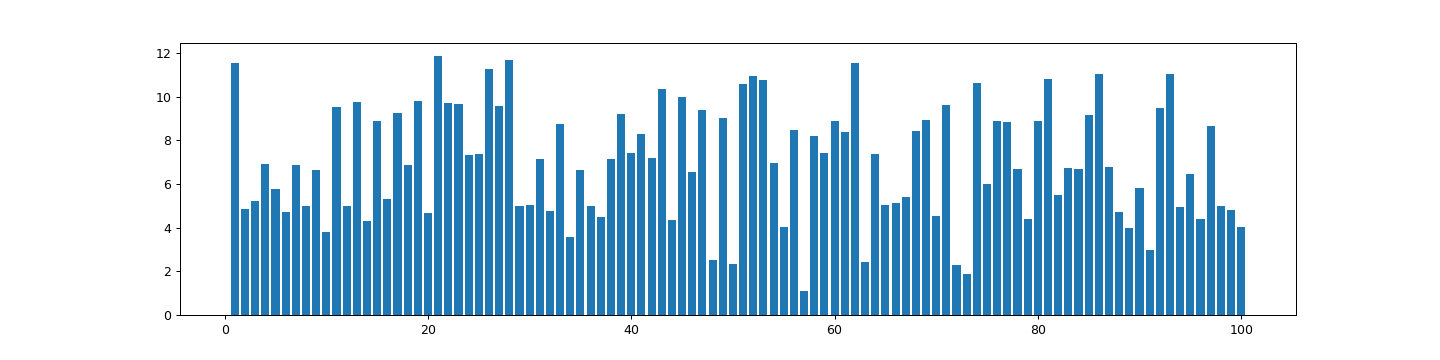

<BarContainer object of 100 artists>

In [54]:
iterations,deviations=zip(*dev_Avg_c_gravity_y_iter.items())
fig = plt.figure(figsize=(16 ,4))
plt.bar(iterations,deviations)

<IPython.core.display.Javascript object>


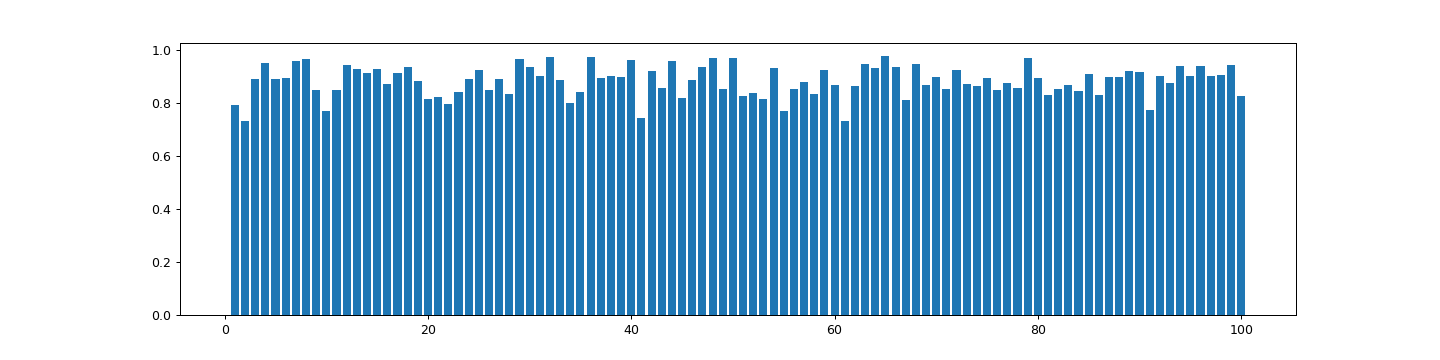

<BarContainer object of 100 artists>

In [55]:
iterations,vol_util=zip(*modified_volume_utilization.items())
fig = plt.figure(figsize=(16 ,4))
plt.bar(iterations,vol_util)

<IPython.core.display.Javascript object>


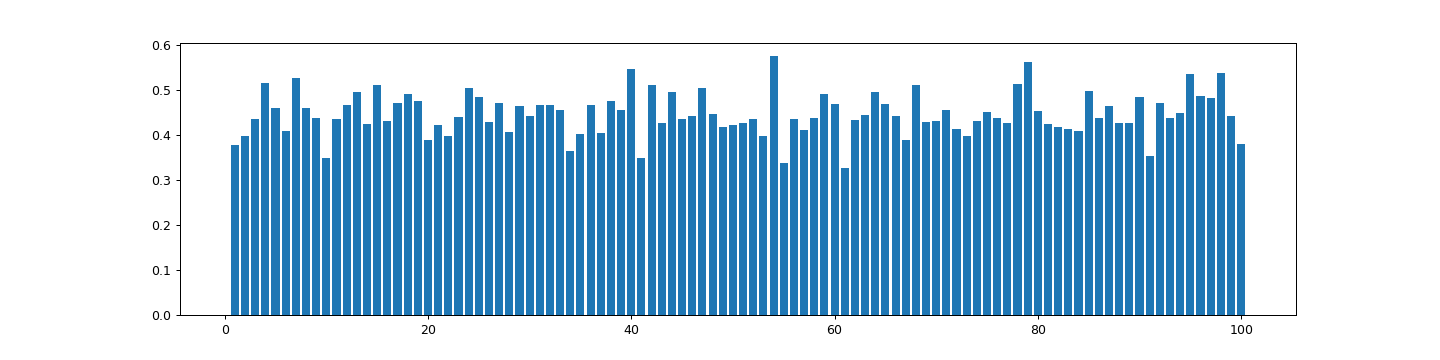

<BarContainer object of 100 artists>

In [56]:
iterations,weight_util=zip(*modified_weight_utilization.items())
fig = plt.figure(figsize=(16 ,4))
plt.bar(iterations,weight_util)

In [57]:
max(Avg_c_gravity_y_iter.values())

16.851416734728335

In [58]:
Avg_weight_utilization_iter={}
for it,bins in weight_utilization_iter.items():
    avg=sum(v for v in bins.values() if v>0)/2
    Avg_weight_utilization_iter[it]=avg


In [59]:
Avg_volume_utilization_iter={}
for it,bins in volume_utilization_iter.items():
    avg=sum(v for v in bins.values() if v>0)/2
    Avg_volume_utilization_iter[it]=avg

In [60]:
Avg_weight_utilization_iter

{1: 1.3306718819871255,
 2: 0.6907141297226469,
 3: 0.8872344762320741,
 4: 1.038990198525359,
 5: 0.9232918733555882,
 6: 0.7539048918977943,
 7: 1.156499727014632,
 8: 0.7765815680279538,
 9: 0.8840188047920631,
 10: 0.5302044478415957,
 11: 1.1406097271186264,
 12: 0.8581922908932081,
 13: 1.3069922108175,
 14: 0.670952609740118,
 15: 1.3003258483345292,
 16: 0.8734172906332222,
 17: 1.3150841912873472,
 18: 1.0171562620243553,
 19: 1.210332399983361,
 20: 0.6912480891024241,
 21: 1.331186295614555,
 22: 1.2154893119728782,
 23: 1.1525651915057353,
 24: 1.2333476325668944,
 25: 1.0600976403664764,
 26: 1.3457032389063945,
 27: 1.3160310761343192,
 28: 1.3656166011501785,
 29: 0.7473464366309965,
 30: 0.8443529518817792,
 31: 1.0870876023045164,
 32: 0.7562524568683118,
 33: 1.184233930261338,
 34: 0.5596660842978817,
 35: 0.8500506478852733,
 36: 0.9244871150906311,
 37: 0.628556453374099,
 38: 1.1256975894092076,
 39: 1.1474322866294366,
 40: 1.289623269792739,
 41: 0.8868243222163

In [61]:
plt.scatter(list(max_weight_utilization_iter.values()), list(max_volume_utilization_iter.values()),  markersize=16, label='Non Pareto-optimal')
#_=plt.title('The input data', fontsize=15)
plt.xlabel('Objective 1', fontsize=16)
plt.ylabel('Objective 2', fontsize=16)
#plt.show()

AttributeError: 'PathCollection' object has no property 'markersize'

In [62]:
list(max_weight_utilization_iter.values())

[0.48738589211618255,
 0.46417543859649124,
 0.4699170124481328,
 0.6579875518672199,
 0.4963070539419087,
 0.47892116182572614,
 0.6642946058091286,
 0.531140350877193,
 0.6028215767634855,
 0.43040350877192984,
 0.5035269709543568,
 0.5111618257261411,
 0.6429045643153527,
 0.4839473684210526,
 0.6932572614107884,
 0.5433402489626556,
 0.6138796680497925,
 0.6070539419087136,
 0.732551867219917,
 0.5352489626556016,
 0.6005186721991701,
 0.6230497925311204,
 0.5932365145228216,
 0.6847302904564315,
 0.5991078838174274,
 0.5646887966804979,
 0.6321161825726141,
 0.4985,
 0.4737719298245614,
 0.4824066390041494,
 0.6363070539419087,
 0.484149377593361,
 0.5870539419087137,
 0.4550877192982456,
 0.44663900414937757,
 0.4897017543859649,
 0.4493684210526316,
 0.6333609958506224,
 0.5582780082987552,
 0.6934439834024896,
 0.499356846473029,
 0.7344398340248963,
 0.5158298755186722,
 0.5800414937759336,
 0.5900207468879668,
 0.5202282157676349,
 0.6185477178423237,
 0.4556491228070175,
 0.

<IPython.core.display.Javascript object>


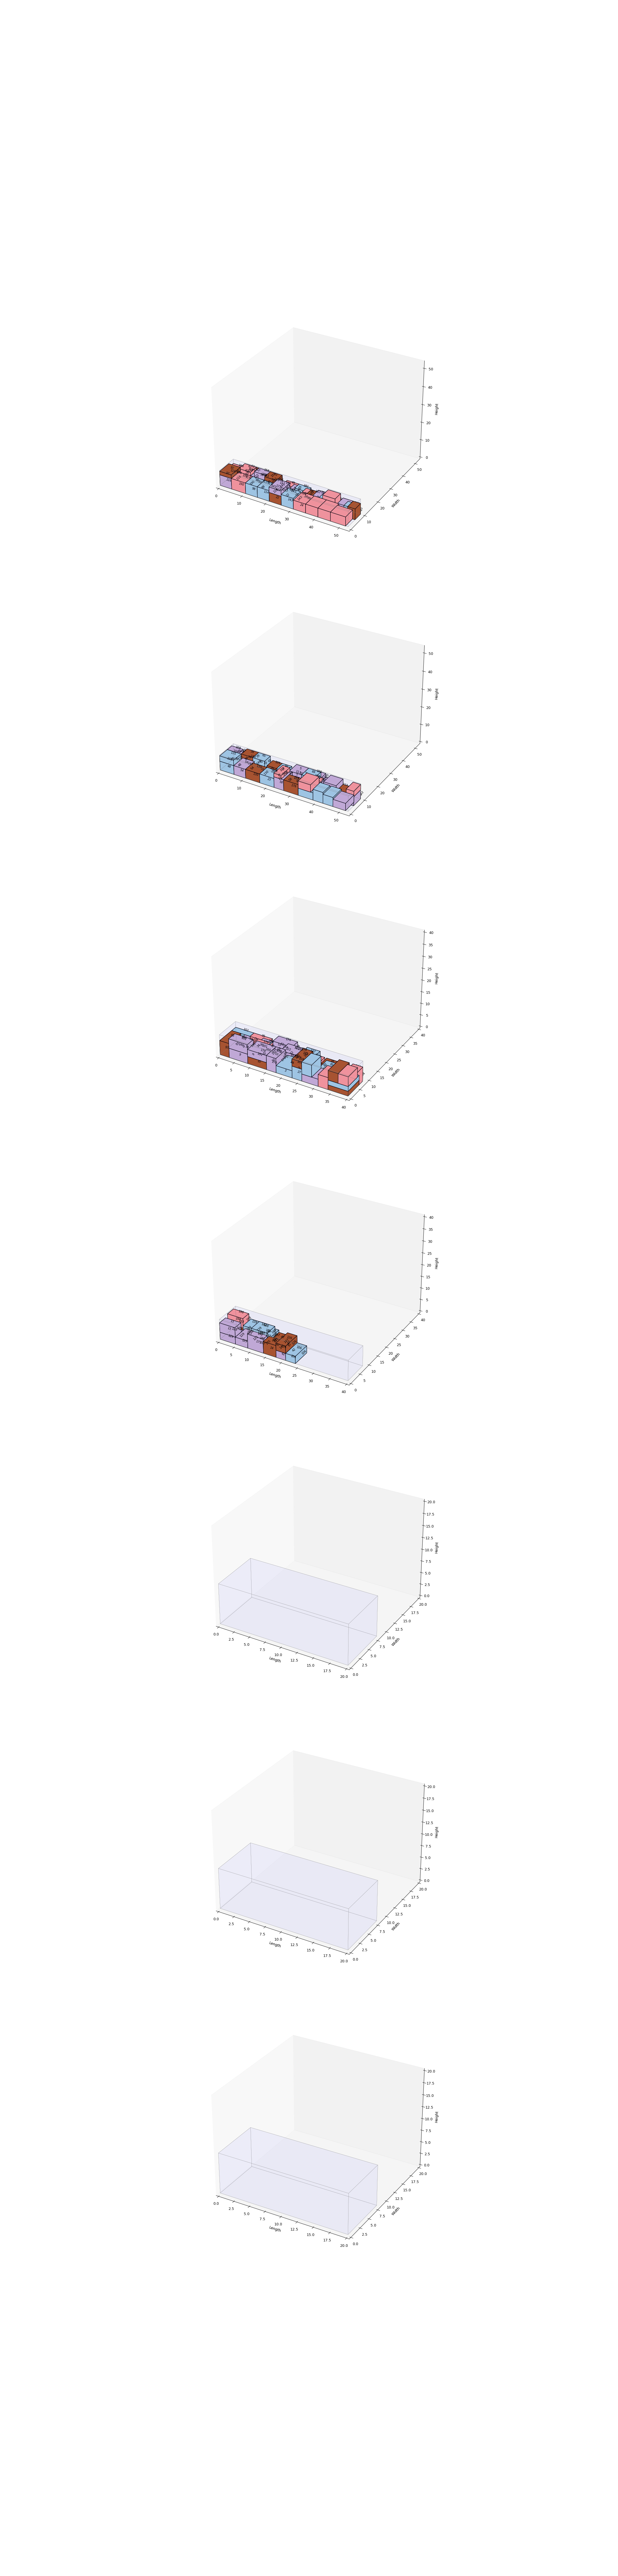

In [63]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mycolorpy import colorlist as mcp

from itertools import product
%matplotlib inline
%matplotlib nbagg
from matplotlib import cm

used_iter=max_iter_volume
flb={}
flt={}
frt={}
frb={}

rlb={}
rlt={}
rrt={}
rrb={}


nrows=len(bins)
fig = plt.figure(figsize=(24 ,100))


colors={}
classes=list(set(p_class.values()))
#size=len(set(p_class.values()))
c=mcp.gen_color(cmap="Paired",n=len(classes))
for i in range(len(classes)):
    colors[classes[i]]=c[i]
color={}
for  i,value in p_class.items():
    color[i]=colors[value]

# create list of corners
#z = list(product([-1,1], repeat=3))
for e in bins:

    x={}
    y={}
    z={}

    l={}
    w={}
    h={}


    ax = fig.add_subplot(nrows,1,e, projection='3d')
    FLB=(0,0,0)
    FLT=(0,0,H[e])
    FRT=(0,W[e],H[e])
    FRB=(0,W[e],0)

    RLB=(L[e],0,0)
    RLT=(L[e],0,H[e])
    RRT=(L[e],W[e],H[e])
    RRB=(L[e],W[e],0)

    bin_verts=[  [FLB,FLT,FRT,FRB],
             [FLB,FLT,RLT,RLB],
             [FLT,FRT,RRT,RLT],
             [RRT,FRT,FRB,RRB],
             [RLB,FLB,FRB,RRB],
             [RLB,RLT,RRT,RRB ]
             ]
    ax.set_xlim3d(0,L[e])
    ax.set_ylim3d(0,L[e])
    ax.set_zlim3d(0,L[e])
    ax.set_xlabel('Length')
    ax.set_ylabel('Width')
    ax.set_zlabel('Height')
    ax.grid(False)
# plot sides
    ax.add_collection3d(Poly3DCollection(bin_verts,facecolors='blue', linewidths=0.25, edgecolors='grey', alpha=.025))

    for c in p_class:
        c=mcp.gen_color(cmap="seismic",n=5)
#for e in IP_iter_update.keys():

    for i in IP_iter[used_iter][e]:
        x[i]=x_iter[used_iter][e][i]
        y[i]=y_iter[used_iter][e][i]
        z[i]=z_iter[used_iter][e][i]

        l[i]=l_iter[used_iter][e][i]
        w[i]=w_iter[used_iter][e][i]
        h[i]=h_iter[used_iter][e][i]

        flb[i]=(x[i],y[i],z[i])
        flt[i]=(x[i],y[i],z[i]+h[i])
        frt[i]=(x[i],y[i]+w[i],z[i]+h[i])
        frb[i]=(x[i],y[i]+w[i],z[i])

        rlb[i]=(x[i]+l[i],y[i],z[i])
        rlt[i]=(x[i]+l[i],y[i],z[i]+h[i])
        rrt[i]=(x[i]+l[i],y[i]+w[i],z[i]+h[i])
        rrb[i]=(x[i]+l[i],y[i]+w[i],z[i])

        box_verts=[  [flb[i],flt[i],frt[i],frb[i]],
                [flb[i],flt[i],rlt[i],rlb[i]],
                [flt[i],frt[i],rrt[i],rlt[i]],
                [rrt[i],frt[i],frb[i],rrb[i]],
                [rlb[i],flb[i],frb[i],rrb[i]],
                [rlb[i],rlt[i],rrt[i],rrb[i]]
                ]



        ax.add_collection3d(Poly3DCollection(box_verts,facecolors=color[i], linewidths=1, edgecolors='black', alpha=1))
        ax.text((x[i]+l[i]),(y[i]+w[i]/2),(z[i]+h[i]/2),   i,'y', size=8, zorder=30,color='black')
        ax.text((x[i]+l[i]/2),(y[i]),(z[i]+h[i]/2),   i,'x', size=8, zorder=30,color='black')
        ax.text((x[i]+l[i]/2),(y[i]+w[i]/2),(z[i]+h[i]),   i,'x', size=8, zorder=30
            ,
    color='black')
#'(%d, %d, %d), dir=%s' % (x, y, z, zdir)

"""
label1 = "FRONT"
label2 = "REAR"
#label3 = "BOTTOM"
ax.text(0, W/2, H/2, '%s' % (label1), size=10,zorder=7, color='black')
ax.text(L, W/2, H/2, '%s' % (label2), size=10,zorder=10, color='blue')
#ax.text(6, 2, 0, '%s' % (label3), size=20,zorder=5, color='blue')
#ax.view_init(elev=0, azim=45)
"""
plt.show()

In [82]:
plt.savefig('3-d-loading-200.png')